In [2]:
from google.colab import files
uploaded=files.upload()

Saving Instagram_User_Summary.csv to Instagram_User_Summary.csv


In [3]:
import io
import pandas as pd
df=pd.read_csv("Instagram_User_Summary.csv")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [8]:
data.isnull().sum() ##checking mising values

,0
user_id,0
username,0
created_at,0
total_photos_uploaded,0
total_likes_given,0
total_comments_made,0
total_following,0
total_followers,0


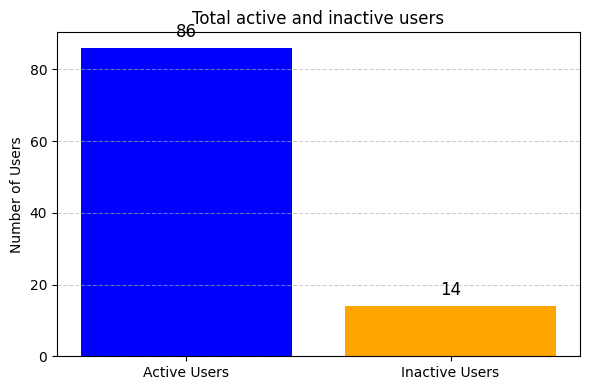

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged user activity CSV
df = pd.read_csv("Instagram_User_Summary.csv")  # Change path if needed

# Define active users: users with at least one post, like, or comment
active_users = df[
    (df["total_photos_uploaded"] > 0) |
    (df["total_likes_given"] > 0) |
    (df["total_comments_made"] > 0)
]

# Calculate counts
active_count = len(active_users)
inactive_count = len(df) - active_count

# Data for bar chart
labels = ['Active Users', 'Inactive Users']
counts = [active_count, inactive_count]
colors = ['blue', 'orange']

# Plot bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=colors)

# Add count labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, f'{yval}', ha='center', va='bottom', fontsize=12)

# Customize chart
plt.title("Total active and inactive users")
plt.ylabel("Number of Users")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


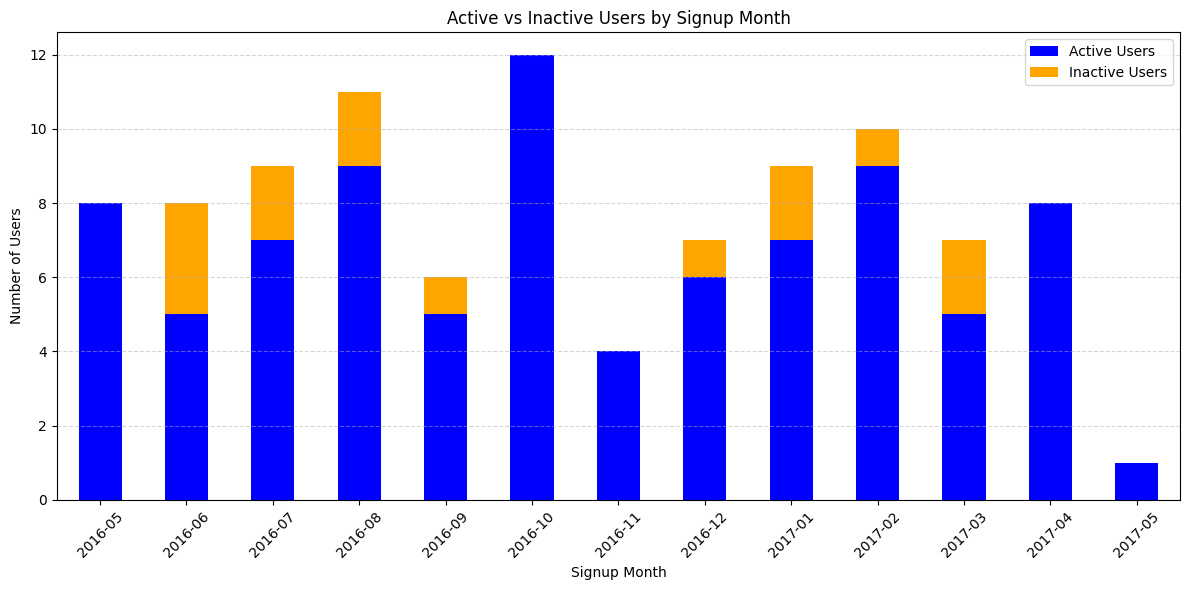

In [25]:
# Comparing inactive and active users by signup month
df['created_at'] = pd.to_datetime(df['created_at'])
df['signup_month'] = df['created_at'].dt.to_period("M")

### Define active and inactive users
active = df[
    (df["total_photos_uploaded"] > 0) |
    (df["total_likes_given"] > 0) |
    (df["total_comments_made"] > 0)
]
inactive = df[
    (df["total_photos_uploaded"] == 0) &
    (df["total_likes_given"] == 0) &
    (df["total_comments_made"] == 0)
]

#### Count active and inactive users per month
active_counts = active.groupby('signup_month').size()
inactive_counts = inactive.groupby('signup_month').size()

#### Combine into one DataFrame
activity_summary = pd.DataFrame({
    'Active Users': active_counts,
    'Inactive Users': inactive_counts
}).fillna(0).astype(int)


### Plot
activity_summary.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'orange'])
plt.title("Active vs Inactive Users by Signup Month")
plt.xlabel("Signup Month")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [27]:
# Pearson Correlation Matrix
### It helps in understanding the linear relationships between all numerical variables
df['created_at'] = pd.to_datetime(df['created_at'])
df['account_age_days'] = (pd.to_datetime('now') - df['created_at']).dt.days

# Calculate the correlation matrix for numerical columns again
numerical_cols = ['total_photos_uploaded', 'total_likes_given', 'total_comments_made', 'total_following', 'total_followers', 'account_age_days']
correlation_matrix = df[numerical_cols].corr(method='pearson')

print("Pearson Correlation Matrix:")
print(correlation_matrix.to_markdown(numalign="left", stralign="left"))

Pearson Correlation Matrix:
|                       | total_photos_uploaded   | total_likes_given   | total_comments_made   | total_following   | total_followers   | account_age_days   |
|:----------------------|:------------------------|:--------------------|:----------------------|:------------------|:------------------|:-------------------|
| total_photos_uploaded | 1                       | -0.369116           | -0.389212             | -0.161651         | 0.109337          | -0.169668          |
| total_likes_given     | -0.369116               | 1                   | 0.985964              | 0.65311           | 0.0810851         | 0.0678479          |
| total_comments_made   | -0.389212               | 0.985964            | 1                     | 0.549695          | 0.068246          | 0.0739047          |
| total_following       | -0.161651               | 0.65311             | 0.549695              | 1                 | 0.124152          | 0.0633395          |
| total_followers 

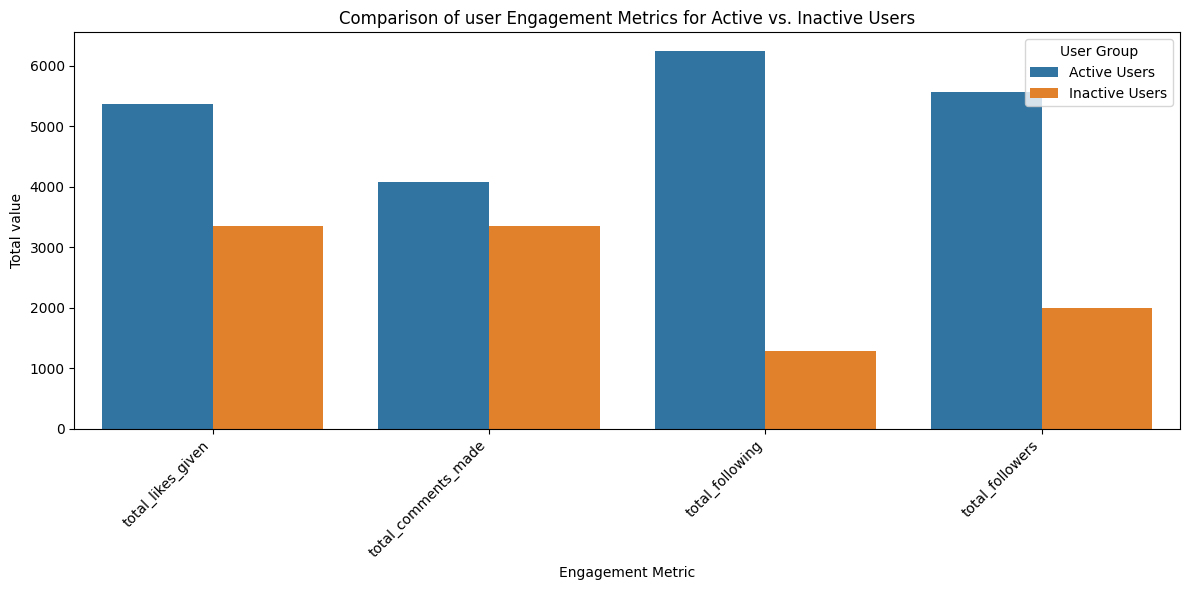

In [43]:
# Define 'active' and 'inactive' users based on 'total_photos_uploaded' in this cell
active_users = df[df['total_photos_uploaded'] > 0]
inactive_users = df[df['total_photos_uploaded'] == 0]

# Calculate the sum of key engagement metrics for each group
# Calculate the sum for each metric directly
active_means = active_users[['total_likes_given', 'total_comments_made', 'total_following', 'total_followers']].sum()
inactive_means = inactive_users[['total_likes_given', 'total_comments_made', 'total_following', 'total_followers']].sum()

# Create a DataFrame for plotting using the calculated sum Series
# The index of the Series (the metric names) will become the 'Metric' column
comparison_df = pd.DataFrame({
    'Active Users': active_means,
    'Inactive Users': inactive_means
}).reset_index() # Reset index to make the metric names a column

# Rename the index column to 'Metric'
comparison_df = comparison_df.rename(columns={'index': 'Metric'})

comparison_df_melted = comparison_df.melt(id_vars='Metric', var_name='User Group', value_name='Sum Value') # Added value_name for clarity in melt

# Set up the figure and axes for bar plots
plt.figure(figsize=(12, 6))

# Create bar plot, using 'Sum Value' from the melted DataFrame
sns.barplot(x='Metric', y='Sum Value', hue='User Group', data=comparison_df_melted)
plt.title('Comparison of user Engagement Metrics for Active vs. Inactive Users')
plt.xlabel('Engagement Metric')
plt.ylabel('Total value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()